# Exercise 8.02
Import the required Libraries

In [2]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


Initiate the Model

In [3]:
classifier = VGG16()
classifier.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Load the Image

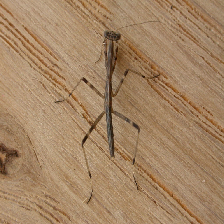

In [4]:
new_image = image.load_img('../Data/Prediction/stick_insect.jpg', target_size=(224, 224))
new_image

Change the image to array

In [5]:
transformed_image = image.img_to_array(new_image)
transformed_image.shape

(224, 224, 3)

Expand the tranfromed image with 4th Dimension

In [6]:
transformed_image = np.expand_dims(transformed_image, axis=0)
transformed_image.shape

(1, 224, 224, 3)

Preprocess the Image

In [7]:
transformed_image = preprocess_input(transformed_image)
transformed_image

array([[[[-7.9390030e+00,  1.6221001e+01,  4.3320000e+01],
         [ 2.0609970e+00,  2.4221001e+01,  5.1320000e+01],
         [ 1.6060997e+01,  3.2221001e+01,  5.6320000e+01],
         ...,
         [ 7.0609970e+00,  2.1221001e+01,  4.0320000e+01],
         [-1.9390030e+00,  1.6221001e+01,  3.4320000e+01],
         [-6.9390030e+00,  1.4221001e+01,  3.1320000e+01]],

        [[ 9.0609970e+00,  3.3221001e+01,  6.0320000e+01],
         [ 6.0997009e-02,  2.2221001e+01,  4.9320000e+01],
         [ 8.0609970e+00,  3.1221001e+01,  5.4320000e+01],
         ...,
         [-6.9390030e+00,  1.1221001e+01,  2.9320000e+01],
         [-2.9390030e+00,  1.4221001e+01,  3.2320000e+01],
         [ 6.0609970e+00,  2.0221001e+01,  3.9320000e+01]],

        [[ 1.0060997e+01,  3.7221001e+01,  6.5320000e+01],
         [ 9.0609970e+00,  2.8221001e+01,  5.7320000e+01],
         [-9.3900299e-01,  1.8221001e+01,  4.6320000e+01],
         ...,
         [-6.9390030e+00,  9.2210007e+00,  2.9320000e+01],
         [

Create a predictor variable

In [8]:
y_pred = classifier.predict(transformed_image)
y_pred

array([[4.21829981e-07, 1.85480451e-06, 1.72294085e-06, 6.76564525e-07,
        2.89053751e-05, 1.41852961e-05, 1.71890442e-05, 2.24749624e-06,
        3.92589482e-06, 3.78673963e-06, 2.06268323e-05, 7.51030393e-06,
        1.40643460e-05, 3.43733154e-05, 1.98462640e-05, 8.18990975e-06,
        1.08288223e-05, 1.76717931e-05, 1.64576650e-05, 3.33322532e-05,
        2.74088507e-05, 3.04659238e-06, 5.54778899e-06, 4.73525324e-06,
        3.29870386e-06, 1.77044087e-04, 1.83029479e-04, 5.83823072e-04,
        5.24099509e-04, 1.54459769e-06, 5.06804136e-05, 1.18027812e-04,
        2.67617492e-04, 1.81688793e-05, 3.93874470e-05, 4.16620605e-05,
        1.94424774e-05, 3.64137486e-05, 4.32395318e-04, 1.50895321e-05,
        6.48876361e-04, 8.92810232e-04, 4.67032398e-04, 1.95193552e-05,
        1.00129563e-03, 1.36421731e-04, 4.56671522e-04, 4.72387110e-05,
        5.16184491e-06, 2.23003917e-05, 1.38761870e-05, 3.23492600e-06,
        3.17189406e-04, 1.60120311e-04, 1.34436399e-04, 1.187295

Check the shape of the array

In [9]:
y_pred.shape

(1, 1000)

Make the predictions

In [10]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred, top=5)

[[('n02231487', 'walking_stick', 0.30524516),
  ('n01775062', 'wolf_spider', 0.26035702),
  ('n03804744', 'nail', 0.14323168),
  ('n01770081', 'harvestman', 0.066652186),
  ('n01773549', 'barn_spider', 0.03670299)]]

Make the predictions in readable form

In [11]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

walking_stick (30.52%)
